In [1]:
import jieba
import jieba.analyse
import re
import pandas as pd
import urllib.parse as ur
import os 
import numpy as np
from sklearn.model_selection import train_test_split
#os.getcwd()
df = pd.DataFrame(pd.read_csv('/Users/kuoloading/Downloads/news.csv'))
data = pd.DataFrame(pd.read_csv('/Users/kuoloading/Downloads/TextandLabel.csv'))
print(df.columns)

Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url'],
      dtype='object')


In [2]:
train_texts = []
for i in range(len(data["Text"])):
    train_texts += [data["Text"][i]]
train_labels = []
for i in range(len(data["Label"])):
    train_labels += [data['Label'][i]]
print(len(train_texts))
print(len(train_labels))

901
901


In [3]:
##Split Data
X =  np.array(train_texts)
y =  np.array(train_labels)
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=101)
print(len(train_texts))
print(len(test_texts))
print(len(train_labels))
print(len(test_labels))

720
181
720
181


In [5]:
import sys
import importlib
importlib.reload(sys)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer   
from sklearn.svm import SVC   
from sklearn.metrics import confusion_matrix
#reload(sys)
#sys.setdefaultencoding('utf8')
VECTOR_DIR = 'vectors.bin'

#all_text = train_texts + test_texts

all_text = train_texts 
print (' (1)doc to var in process...')

count_v0= CountVectorizer();  
counts_all = count_v0.fit_transform(all_text);
count_v1= CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_train = count_v1.fit_transform(train_texts);   
print ("the shape of train is "+repr(counts_train.shape)  )
count_v2 = CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_test = count_v2.fit_transform(test_texts);  
print ("the shape of test is "+repr(counts_test.shape)  )
  
tfidftransformer = TfidfTransformer();    
train_data = tfidftransformer.fit(counts_train).transform(counts_train);
test_data = tfidftransformer.fit(counts_test).transform(counts_test); 

x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

print( '(2) SVM...')
#svclf = SVC(kernel = 'linear', C=0.0001, max_iter=-1) 
svclf = SVC(kernel = 'linear', C=1) 
svclf.fit(x_train,y_train)  
preds = svclf.predict(x_test);  
num = 0
preds = preds.tolist()
for i,pred in enumerate(preds):
    #print(pred)
    if int(pred) == int(y_test[i]):
        num += 1
print ('precision_score:' + str(float(num) / len(preds)))

matrix = confusion_matrix(y_test, preds)
print(matrix)
np.save('confusion_matrix.npy', matrix)
#matrix = confusion_matrix(x_test, preds)
#print(matrix)

 (1)doc to var in process...
the shape of train is (720, 35397)
the shape of test is (181, 35397)
(2) SVM...
precision_score:0.856353591160221
[[ 43  23]
 [  3 112]]


Confusion matrix, without normalization
[[ 43  23]
 [  3 112]]
Normalized confusion matrix
[[0.65151515 0.34848485]
 [0.02608696 0.97391304]]


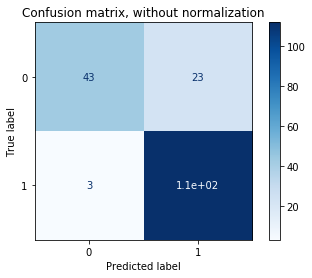

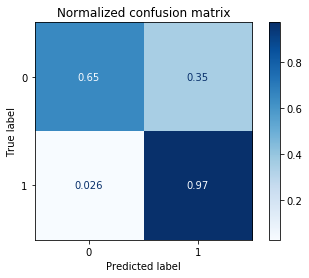

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#classifier = †(kernel='linear', C=0.01).fit(x_train, y_train)
classifier = SVC(kernel='linear').fit(x_train, y_train)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=["0","1"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()